<a href="https://colab.research.google.com/github/niyantha23/Image-Forgery-Detection/blob/main/Image_Processing_Review_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image, ImageChops, ImageEnhance
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from keras.utils.np_utils import to_categorical


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -qq '/content/drive/My Drive/VIT/Image Processing/Dataset/casia21p2k.zip'

In [ ]:
data_dir = "/content/casia21p2k/"

In [ ]:
#data_dir="/VIT/SEM-5/IMAGE PROCESSING/proj/Dataset/casia21p5k"

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [ ]:
#data_dir = "/content/CASIA1/"
#train_dir=os.path.join(data_dir,'train')
#val_dir=os.path.join(data_dir,'val')
#test_dir=os.path.join(data_dir,'test')

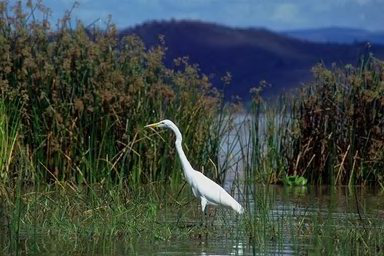

In [ ]:
real_image_path = data_dir+'/Au/Au_ani_00002.jpg'
Image.open(real_image_path)

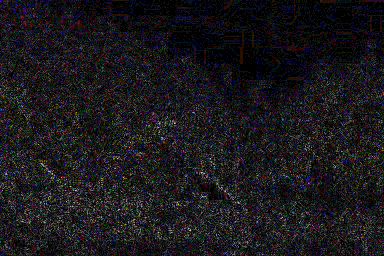

In [ ]:
convert_to_ela_image(real_image_path, 90)

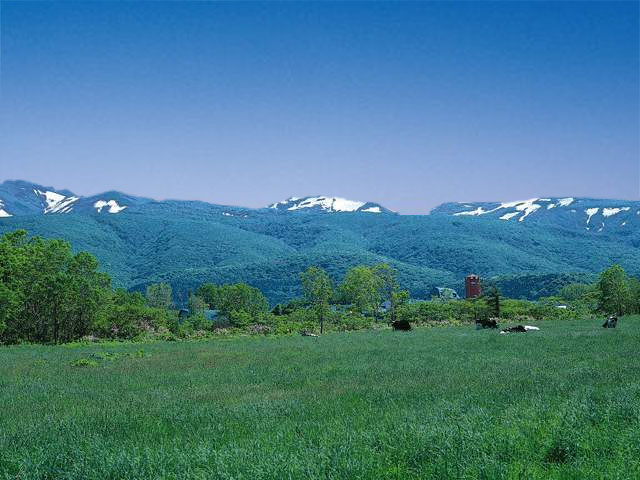

In [ ]:
real_image_path = data_dir+'/Tp/Tp_D_CNN_M_N_nat10139_nat00095_11947.jpg'
Image.open(real_image_path)

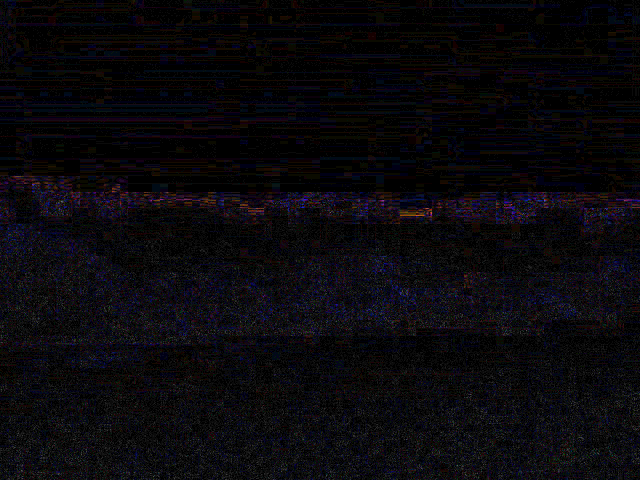

In [ ]:
convert_to_ela_image(real_image_path, 90)

In [ ]:
batch_size=1
input_shape=(256,256,3)
image_size=(256,256)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:
X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

In [ ]:
import random
path = data_dir+'/Au/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png')or filename.endswith('JPG'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

print(len(X), len(Y))

Processing 500 images


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Processing 1000 images
1187 1187


In [ ]:
#X = X[:5100]
#Y = Y[:5100]

In [ ]:
print(len(X), len(Y))

1187 1187


In [ ]:
path = data_dir+'/Tp/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png')or filename.endswith('JPG')or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

print(len(X), len(Y))

Processing 1500 images
Processing 2000 images
2387 2387


In [ ]:
X = np.array(X)

In [ ]:
Y = to_categorical(Y, 2)
print(Y)


[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
X = X.reshape(-1, 256, 256, 3)

In [ ]:
X.shape

(2387, 256, 256, 3)

In [ ]:
X_train, X_rest, Y_train, Y_rest = train_test_split(X, Y, test_size = 0.1, random_state=5)
X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_rest), len(Y_rest))

2148 2148
239 239


In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size = 0.5,random_state=5)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))
print(len(X_test), len(Y_test))

2148 2148
119 119
120 120


In [ ]:
#def preprocessing(img):

 # data=Image.fromarray(img.astype('uint8'),"RGB")
 # data.save("temp.jpg", 'JPEG', quality = 90)
 # temp_img=Image.open("temp.jpg")
 # ela=ImageChops.difference(data,temp_img)
  #extreme=ela.getextrema()
  #max_diff = max([ex[1] for ex in extreme])
  #if max_diff == 0:
  #  max_diff = 1
  #scale = 255.0 / max_diff
    
  #ela_image = ImageEnhance.Brightness(ela).enhance(scale.astype('uint8'))


    #img = img.img_to_array(img, dtype='uint8')
    #blur = cv2.blur(img, (3, 3)).astype('uint8')
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    #img[:,:,0] = cv2.equalizeHist(img[:,:,0])
    #ret,th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #img_blur = cv2.medianBlur(img,5).astype('uint8')
    #img_thresh_Gaussian = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    #img = cv2.cvtColor(img, cv2.COLOR_YUV2BGR)
  #return np.array(ela)
  #return data

In [ ]:
#train_image_gen=ImageDataGenerator(rescale=1./255, preprocessing_function=preprocessing)
#train_image_gen=ImageDataGenerator( rescale=1./255,
#      brightness_range=[0.9 ,1.7],
#      horizontal_flip=True,
#      vertical_flip=True
#      )
#train_data=train_image_gen.flow_from_directory(directory=train_dir,batch_size=batch_size,target_size=(256,256),shuffle=True)


In [ ]:
#val_image_gen=ImageDataGenerator(rescale=1./255)
#val_data=val_image_gen.flow_from_directory(directory=val_dir,batch_size=batch_size,target_size=(256,256))

Found 172 images belonging to 2 classes.


In [ ]:
#for i in val_data:
#  print(i[1][0])

In [ ]:
#print(train_data[1][0])
#print(val_data[][])




In [ ]:
#sample_training_images, _ = next(train_data) 

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(5, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(sample_training_images)

In [ ]:
epochs=12

In [ ]:

init_lr = 0.01
optimizer = tf.keras.optimizers.Adam(lr= init_lr, decay = init_lr/epochs)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)


In [ ]:
model = tf.keras.Sequential([
                             
                           tf.keras.layers.Conv2D(32,(5,5),activation='softmax',input_shape=input_shape),
                           tf.keras.layers.MaxPooling2D(2,2),

                           tf.keras.layers.Conv2D(64,(5,5),activation='softmax'),
                           tf.keras.layers.MaxPooling2D(2,2),

                            tf.keras.layers.Conv2D(64,(5,5),activation='softmax'),
                           tf.keras.layers.MaxPooling2D(2,2),

                           tf.keras.layers.Conv2D(128,(3,3),activation='softmax'),
                           tf.keras.layers.MaxPooling2D(2,2),

                           tf.keras.layers.Conv2D(512,(3,3),activation='softmax'),
                           tf.keras.layers.MaxPooling2D(2,2),

                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512,activation='softmax'),
                           tf.keras.layers.Dense(216,activation='softmax'),

                           tf.keras.layers.Dense(2,activation='softmax')
                          

                           
                           

])

model.summary()
#model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model.compile( loss = "binary_crossentropy", 
               optimizer = optimizer, 
               metrics=['accuracy']
             )

In [ ]:
#Feature extraction
feature_extractor=tf.keras.applications.xception.Xception(
    include_top=False, weights='imagenet',input_shape=(256,256,3)
)


In [ ]:
#for i in range(126):
#  feature_extractor.layers[i].trainable=False

In [ ]:
feature_extractor.trainable=False

In [ ]:
#feature_extractor.trainable=False
#features=feature_extractor.predict(train_data)
model=tf.keras.Sequential([
                           feature_extractor,
                           tf.keras.layers.GlobalAveragePooling2D(),
                           tf.keras.layers.Dense(512,activation='softmax'),
                           
                           tf.keras.layers.Dense(2,activation='softmax')
])
model.summary()
#model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model.compile( loss = "binary_crossentropy", 
               optimizer = optimizer, 
               metrics=['accuracy']
             )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 21,911,594
Trainable params: 1,050,114
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
X_train.shape

(2148, 256, 256, 3)

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                              min_delta = 0,
                              patience = 50,
                              verbose = 0,
                              mode = 'max')

In [ ]:

#h= model.fit(train_data,steps_per_epoch=int(np.ceil(train_data.n/float(batch_size))),epochs=epochs,validation_data=val_data,validation_steps=int(np.ceil(val_data.n/float(batch_size))))

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                )

Epoch 1/12
2148/2148 [==============================] - 72s 28ms/step - loss: 0.6952 - accuracy: 0.4888 - val_loss: 0.6905 - val_accuracy: 0.5378
Epoch 2/12
2148/2148 [==============================] - 57s 26ms/step - loss: 0.6938 - accuracy: 0.5107 - val_loss: 0.6972 - val_accuracy: 0.4622
Epoch 3/12
2148/2148 [==============================] - 57s 26ms/step - loss: 0.5779 - accuracy: 0.7328 - val_loss: 0.4529 - val_accuracy: 0.8571
Epoch 4/12
2148/2148 [==============================] - 59s 28ms/step - loss: 0.4392 - accuracy: 0.8426 - val_loss: 0.3831 - val_accuracy: 0.8655
Epoch 5/12
2148/2148 [==============================] - 57s 26ms/step - loss: 0.3833 - accuracy: 0.8696 - val_loss: 0.3371 - val_accuracy: 0.8908
Epoch 6/12
2148/2148 [==============================] - 57s 27ms/step - loss: 0.3598 - accuracy: 0.8724 - val_loss: 0.2997 - val_accuracy: 0.8992
Epoch 7/12
2148/2148 [==============================] - 57s 26ms/step - loss: 0.3276 - accuracy: 0.8827 - val_loss: 0.3118 -

In [ ]:
#model.save("/content/drive/My Drive/VIT/Image Processing/Dataset/model_88_Testacc.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


jupyter notebook \ --NotebookApp.allow_origin='https://colab.research.google.com' \ --port=8888 \ --NotebookApp.port_retries=0

In [ ]:
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=1)
print("test loss, test acc:", results)

Evaluate on test data
120/120 [==============================] - 3s 25ms/step - loss: 0.2910 - accuracy: 0.8833
test loss, test acc: [0.2910372018814087, 0.8833333253860474]


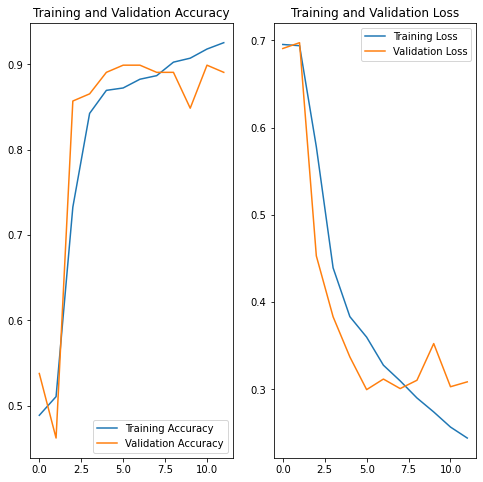

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model2=tf.keras.models.load_model("/content/drive/My Drive/VIT/Image Processing/Dataset/85.7acc/model_85_7Testacc.h5")
print("Evaluate on test data")
results = model2.evaluate(X_test, Y_test, batch_size=8)
print("test loss, test acc:", results)

Evaluate on test data
15/15 [==============================] - 12s 100ms/step - loss: 0.2164 - accuracy: 0.9333
test loss, test acc: [0.21636050939559937, 0.9333333373069763]


In [ ]:
y=[]
for x in X_test:
  img=np.expand_dims(x,axis=0)
  classes=model2.predict(img)
  y.append(np.argmax(classes))
print(y)

[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1]


In [ ]:
labels=[]
for x in Y_test:
  labels.append(np.argmax(x))
print(labels)

[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1]


In [ ]:
predictions=y

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels,predictions)
 
# Printing the result
print('Confusion_matrix: ',confusion_matrix)

Confusion_matrix:  [[58  2]
 [ 6 54]]


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig("confusionmatrix.jpg")
    plt.show()

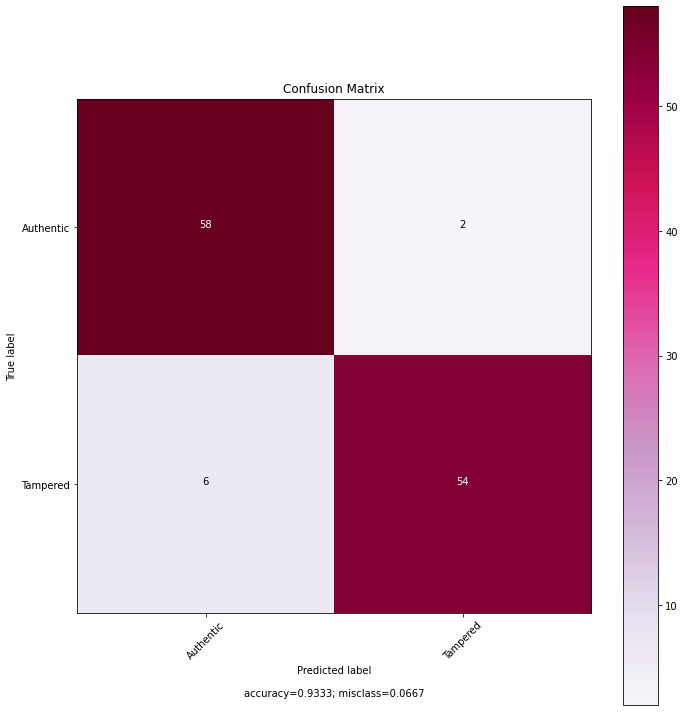

In [ ]:
plot_confusion_matrix(cm=confusion_matrix,target_names=["Authentic","Tampered"],normalize=False,title="Confusion Matrix",cmap="PuRd")

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
perf_measure(labels,predictions)

(51, 1, 59, 9)

In [ ]:
#FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
#FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
#TP = np.diag(confusion_matrix)
#TN = confusion_matrix.values.sum() - (FP + FN + TP)
TP=51
FP=1
TN=59
FN=9
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Recall:",TPR, "\nTrue negative rate:",TNR,"\nPrecision or positive predictive value:",PPV,
     "\nNegative predictive value:",NPV,"\nfalse positive rate:",FPR,"\nFalse negative rate:",FNR,"\nFalse discovery rate:",FDR )

Recall: 0.85 
True negative rate: 0.9833333333333333 
Precision or positive predictive value: 0.9807692307692307 
Negative predictive value: 0.8676470588235294 
false positive rate: 0.016666666666666666 
False negative rate: 0.15 
False discovery rate: 0.019230769230769232


In [ ]:
#Prediction Demo

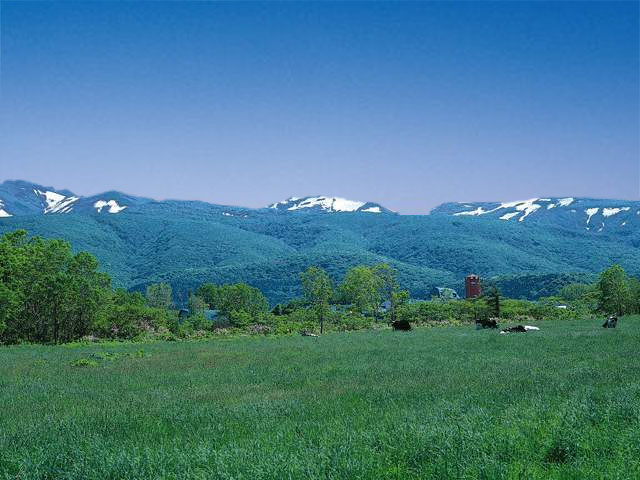

In [ ]:
img_path=data_dir+"/Tp/Tp_D_CNN_M_N_nat10139_nat00095_11947.jpg"
Image.open(img_path)


In [ ]:
img=prepare_image(img_path)
img=np.array(img)
img = img.reshape(-1, 256, 256, 3)
#img=np.expand_dims(img,axis=0)
prediction=np.argmax(model2.predict(img))
print(prediction)

0


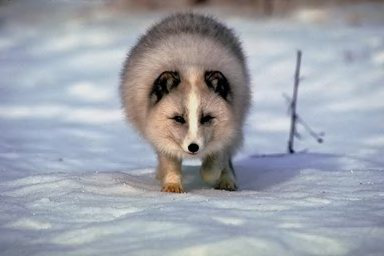

In [ ]:
img_path=data_dir+"/Au/Au_ani_30550.jpg"
Image.open(img_path)

In [ ]:
img=prepare_image(img_path)
img=np.array(img)
img = img.reshape(-1, 256, 256, 3)
#img=np.expand_dims(img,axis=0)
prediction=np.argmax(model2.predict(img))
print(prediction)

1


In [ ]:
y=[]

In [ ]:
X_test[1].shape

(256, 256, 3)

In [ ]:
for x in X_test:
  img=np.expand_dims(x,axis=0)
  classes=model.predict(img)
  y.append(np.argmax(classes))
print(y,Y_test)

In [ ]:
for i in range(200):
  if (np.argmax(Y_test[i])==1):
    print(i)

In [ ]:
np.argmax(Y_test[144])

1

In [ ]:
np.argmax(model.predict(np.expand_dims(X_test[144],axis=0)))

1

In [ ]:
for dirname, _ , filenames in os.walk(test_dir+"/Sp"):
  for filename in filenames:
      full_path=os.path.join(dirname,filename)
      img=image.load_img(full_path,target_size=(256,256,3))  
      img=image.img_to_array(img)
      img=np.expand_dims(img,axis=0)
      classes=model.predict(img)
      print(classes,np.argmax(classes,axis=1)[0])

[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[1.3554353e-23 1.0000000e+00]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[4.3327283e-31 1.0000000e+00]] 1
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[1.0286268e-08 1.0000000e+00]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[1.000000e+00 4.159365e-21]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[3.5519294e-29 1.0000000e+00]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[0.

In [ ]:
for dirname, _ , filenames in os.walk(test_dir+"/Au"):
  for filename in filenames:
      full_path=os.path.join(dirname,filename)
      img=image.load_img(full_path,target_size=(256,256,3))  
      img=image.img_to_array(img)
      img=np.expand_dims(img,axis=0)
      classes=model.predict(img)
      print(classes,np.argmax(classes,axis=1)[0])

[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[1.0000000e+00 5.9776455e-19]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[0. 1.]] 1
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[1. 0.]] 0
[[1. 0.]] 0
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[1. 0.]] 0
[[0. 1.]] 1
[[0. 1.]] 1
[[0. 1.]] 1


In [ ]:
model2=tf.keras.models.load_model("/content/drive/My Drive/VIT/Image Processing/Dataset/model1.h5")
print("Evaluate on test data")
results = model2.evaluate(X_test, Y_test, batch_size=8)
print("test loss, test acc:", results)